In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
!wget --no-check-certificate https://catalabs.mx/datasets/titanic.csv -O titanic.csv

--2024-05-21 05:18:40--  https://catalabs.mx/datasets/titanic.csv
Resolving catalabs.mx (catalabs.mx)... 174.136.30.149
Connecting to catalabs.mx (catalabs.mx)|174.136.30.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/csv]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.08s   

2024-05-21 05:18:40 (779 KB/s) - ‘titanic.csv’ saved [60302/60302]



In [ ]:
titanic = pd.read_csv("titanic.csv")

In [58]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


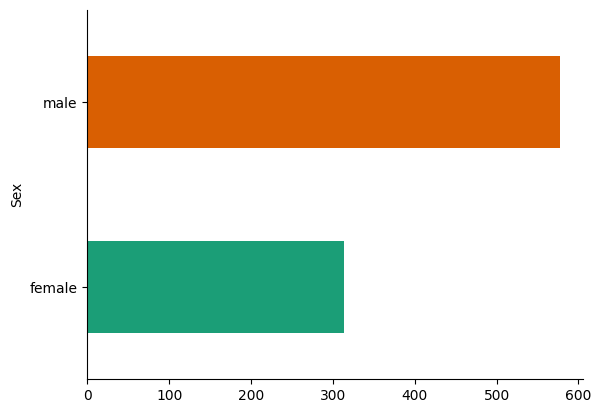

In [59]:
# @title Sex

from matplotlib import pyplot as plt
import seaborn as sns
titanic.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
sobrevivio = titanic[titanic['Survived'] == 1]
no_sobrevivio = titanic[titanic['Survived'] == 0]

In [ ]:
sobrevivio = titanic[titanic['Survived'] == 1]
no_sobrevivio = titanic[titanic['Survived'] == 0]

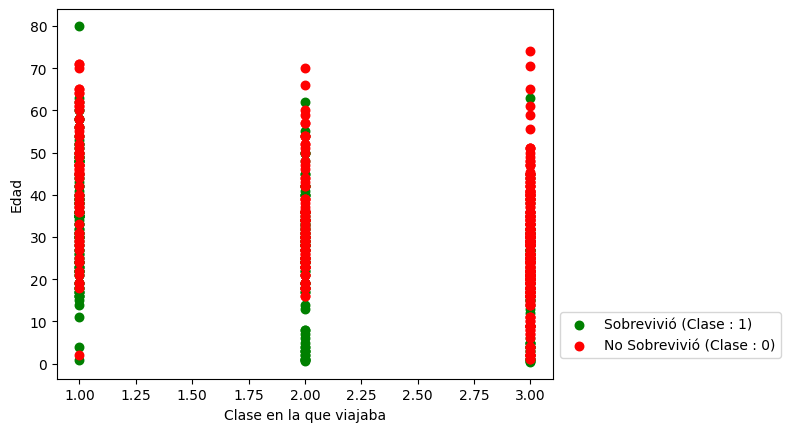

In [29]:
plt.scatter(sobrevivio['Pclass'], sobrevivio['Age'], marker='.', s =150, color = 'green', label = 'Sobrevivió')

plt.scatter(no_sobrevivio['Pclass'], no_sobrevivio['Age'], marker='.', s =150, color = 'red', label = 'No Sobrevivió')

plt.xlabel("Clase en la que viajaba")
plt.ylabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

In [38]:
datos = titanic[['Age', 'Pclass']].dropna()
clase = titanic['Survived'][datos.index]

escalator = preprocessing.MinMaxScaler()

datos = escalator.fit_transform(datos)

In [39]:
classificator = KNeighborsClassifier(n_neighbors=3)
classificator.fit(datos, clase)

KNeighborsClassifier(n_neighbors=3)

Predecir si un pasajero sobreviría basandonos en su edad y clase en la que viajaba

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Clase: [0]
Probabilidades por clase [[0.66666667 0.33333333]]


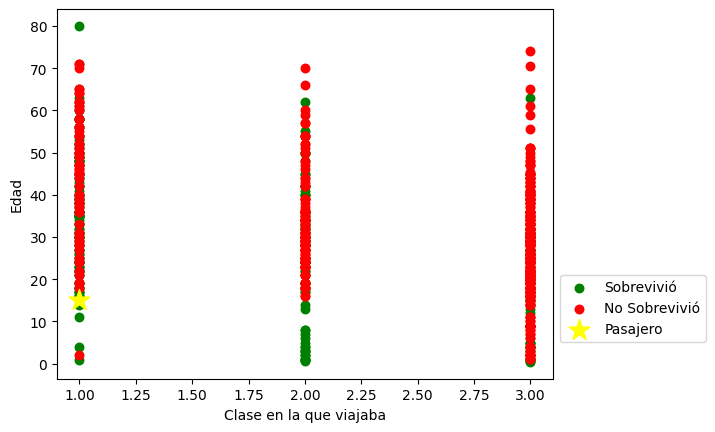

In [41]:
Age = 15
Clase = 1

pasajero = escalator.transform([[Clase, Age]])

print('Clase:', classificator.predict(pasajero))
print('Probabilidades por clase', classificator.predict_proba(pasajero))

plt.scatter(sobrevivio['Pclass'], sobrevivio['Age'], marker='.', s =150, color = 'green', label = 'Sobrevivió')
plt.scatter(no_sobrevivio['Pclass'], no_sobrevivio['Age'], marker='.', s =150, color = 'red', label = 'No Sobrevivió')

plt.scatter(Clase, Age, marker = '*', s = 250, color = 'yellow', label = 'Pasajero')
plt.xlabel("Clase en la que viajaba")
plt.ylabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()

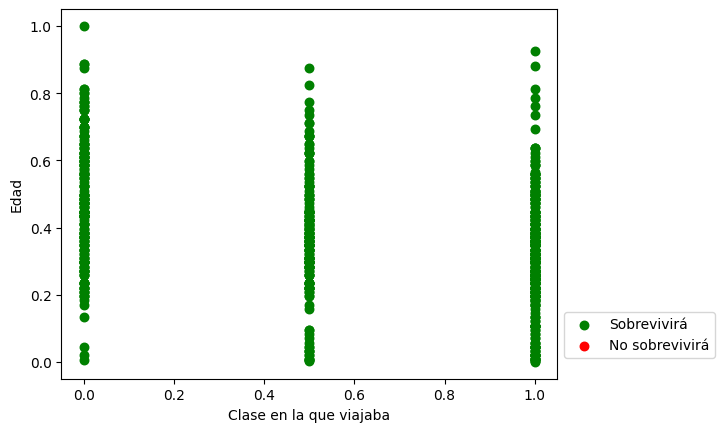

In [57]:
datos = titanic[['Age', 'Pclass']].dropna()
clase = titanic['Survived'][datos.index]

escalator = preprocessing.MinMaxScaler()

datos = escalator.fit_transform(datos)

datos = pd.DataFrame(datos, columns=['Age', 'Pclass'])

pasajerox = escalator.transform(datos)
clases_resultantes = classificator.predict(pasajerox)

sobrevivio = datos[clases_resultantes==1]
no_sobrevivio = datos[clases_resultantes==0]

plt.scatter(sobrevivio['Pclass'], sobrevivio['Age'], marker='.', s=150, color='green', label='Sobrevivirá')
plt.scatter(no_sobrevivio['Pclass'], no_sobrevivio['Age'], marker='.', s=150, color='red', label='No sobrevivirá')
plt.xlabel('Clase en la que viajaba')
plt.ylabel('Edad')
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

Sentí que no era muy relevante en este caso la clase y edad, sino que debí de hacerlo del sexo y la clase en la que se viajaba

In [65]:
def predict_survival(pclass, sex):

  data = titanic[['Pclass', 'Sex']].dropna()
  clase = titanic['Survived'][data.index]

  label_encoder = preprocessing.LabelEncoder()
  data['Sex'] = label_encoder.fit_transform(data['Sex'])

  escalator = preprocessing.MinMaxScaler()
  data = escalator.fit_transform(data)
  data = pd.DataFrame(data, columns=['Pclass', 'Sex'])

  xpasajero = [[pclass, sex]]
  xpasajero[0][1] = label_encoder.transform([sex])[0]
  xpasajero_scaled = escalator.transform(xpasajero)

  prediction = classificator.predict(xpasajero_scaled)

  if prediction[0] == 1:
    print('El pasajero sobrevivirá')
  else:
    print('El pasajero no sobrevivirá')


predict_survival(1, 'female')
predict_survival(3, 'male')

El pasajero sobrevivirá
El pasajero no sobrevivirá


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
